In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = 'data/'

In [3]:
loans = pd.read_csv(f'{PATH}lending-club-data.csv',low_memory=False)

In [4]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',axis=1)

In [9]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [10]:
loans = loans[[target] + features].dropna()

In [13]:
loans = pd.get_dummies(loans)

In [20]:
import json
f = open(f'{PATH}module-8-assignment-1-train-idx.json')
train_idx = json.load(f)
f = open(f'{PATH}module-8-assignment-1-validation-idx.json')
validation_idx = json.load(f)
f.close()

In [21]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
train_data_feature_matrix = train_data.drop(target,axis=1).to_numpy()
train_data_label_array = train_data[target].to_numpy()

In [26]:
model_5 = GradientBoostingClassifier(max_depth=6,n_estimators=5)

In [27]:
model_5.fit(train_data_feature_matrix,train_data_label_array)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
sample_validation_data_feature_matrix = sample_validation_data.drop(target,axis=1).to_numpy()

In [29]:
validation_data_feature_matrix = validation_data.drop(target,axis=1).to_numpy()
validation_data_label_array = validation_data[target].to_numpy()

In [34]:
model_5.predict(sample_validation_data_feature_matrix)

array([ 1,  1, -1,  1], dtype=int64)

### model_5 got 75% percent of predictions on sample_validation_data right

In [35]:
model_5.predict_proba(sample_validation_data_feature_matrix)

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

### the 4th loan has the highest porbability of being classified as a safe loan

In [36]:
model_5.score(validation_data_feature_matrix,validation_data_label_array)

0.6613528651443343

In [38]:
diff = model_5.predict(validation_data_feature_matrix) - validation_data_label_array

In [39]:
np.count_nonzero(diff == 2)

1653

In [41]:
np.count_nonzero(diff == -2)

1491

### model_5 predicts 1653 false positives and 1491 false negatives on the validation data

In [42]:
10000*1491 + 20000*1653

47970000

### Cost of mistakes made by model_5 on validation data = $47970000

In [47]:
validation_data['predictions'] = pd.Series(model_5.predict_proba(validation_data_feature_matrix)[:,1],index=validation_data.index)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
display_all(validation_data.sort_values('predictions',ascending=False))

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
8021,-1,0.4,0,4,12.73,12.167000,0.0,1.0,1.0,1,1,6.0,0.0,1.0,30.5,18.2281,5.99,1202.30,36000.0,12000,12000,365.01,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.673059
34261,1,0.2,0,11,0.74,0.481601,0.0,1.0,0.0,0,1,6.0,0.0,1.0,8.6,0.0000,7.37,117.63,77367.0,1000,92,31.05,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.661468
68947,1,0.4,0,11,13.38,7.676000,0.0,1.0,3.0,1,1,9.0,0.0,1.0,16.5,0.0000,6.62,791.80,72000.0,15000,15000,460.56,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.661468
99626,1,0.4,0,11,2.08,3.825100,0.0,1.0,0.0,1,1,7.0,0.0,1.0,9.5,0.0000,6.62,1834.69,221544.0,23000,22950,706.19,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.661468
69995,1,0.4,0,11,8.73,3.401080,0.0,1.0,4.0,1,1,25.0,0.0,1.0,8.9,0.0000,6.62,1018.88,130000.0,12000,12000,368.45,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.661468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114781,-1,0.4,0,3,21.90,7.187600,1.0,0.0,4.0,0,1,20.0,0.0,1.0,63.4,0.0000,17.57,0.00,60000.0,10000,10000,359.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.315969
101746,-1,0.2,0,11,11.21,4.236240,0.0,1.0,3.0,1,1,7.0,0.0,1.0,22.7,0.0000,16.29,0.00,50000.0,5000,5000,176.51,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.315969
27502,-1,1.0,0,3,8.53,14.628000,0.0,1.0,0.0,1,1,6.0,0.0,1.0,79.5,54.7090,14.22,492.33,45000.0,16000,16000,548.55,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.312806
84508,-1,0.8,1,1,7.37,16.620700,0.0,1.0,1.0,1,1,8.0,0.0,1.0,32.6,24.9300,16.29,2777.21,36000.0,14125,14125,498.62,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.307334


### The top 5 loans are grade A loans

In [51]:
display_all(validation_data.sort_values('predictions'))

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
84508,-1,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,1,8.0,0.0,1.0,32.6,24.9300,16.29,2777.21,36000.0,14125,14125,498.62,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.307334
58794,-1,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,1,8.0,0.0,1.0,64.4,92.5200,16.29,2741.40,42000.0,17475,17475,616.88,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.307334
27502,-1,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,1,6.0,0.0,1.0,79.5,54.7090,14.22,492.33,45000.0,16000,16000,548.55,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.312806
114781,-1,0.4,0,3,21.90,7.18760,1.0,0.0,4.0,0,1,20.0,0.0,1.0,63.4,0.0000,17.57,0.00,60000.0,10000,10000,359.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.315969
101746,-1,0.2,0,11,11.21,4.23624,0.0,1.0,3.0,1,1,7.0,0.0,1.0,22.7,0.0000,16.29,0.00,50000.0,5000,5000,176.51,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.315969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56222,1,0.2,0,11,3.51,5.06448,0.0,1.0,0.0,1,1,13.0,0.0,1.0,10.1,0.0000,6.03,294.04,75000.0,10400,10400,316.53,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.661468
56519,1,0.2,0,5,6.76,3.91320,0.0,1.0,0.0,0,0,11.0,0.0,1.0,22.0,0.0000,6.03,970.68,140000.0,15000,15000,456.54,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.661468
13613,1,0.8,0,2,13.65,1.75065,0.0,1.0,1.0,1,1,6.0,0.0,1.0,22.3,0.0000,7.29,21.55,74400.0,3500,3500,108.54,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.661468
18829,1,0.4,0,11,16.29,2.44954,0.0,1.0,0.0,1,1,6.0,0.0,1.0,19.6,0.0000,5.79,446.86,78000.0,5250,5200,159.22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.661468


### The worst 5 loans are grade C and grade D loans

In [55]:
model_list = []
for i in [10,50,100,200,500]:
    model_list.append(GradientBoostingClassifier(n_estimators=i,max_depth=6))   

In [58]:
for model in model_list:
    model.fit(train_data_feature_matrix,train_data_label_array)
    print(model.score(validation_data_feature_matrix,validation_data_label_array),model.n_estimators_)

0.6654459284791039 10
0.6847264110297285 50
0.6883886255924171 100
0.6897888841016803 200
0.6878500646273158 500


### model with n_estimators = 200 has best accuracy on the validation data

### It is not always true that the model with most trees will perform best on test data

In [59]:
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [61]:
training_errors = [1-model.score(train_data_feature_matrix,train_data_label_array) for model in model_list]

In [63]:
validation_errors = [1-model.score(validation_data_feature_matrix,validation_data_label_array) for model in model_list]

In [66]:
training_errors

[0.32891802573954165,
 0.28270506999113354,
 0.25409065262365993,
 0.21335876837099332,
 0.13458179961847438]

In [67]:
validation_errors

[0.3345540715208961,
 0.31527358897027147,
 0.3116113744075829,
 0.31021111589831973,
 0.3121499353726842]

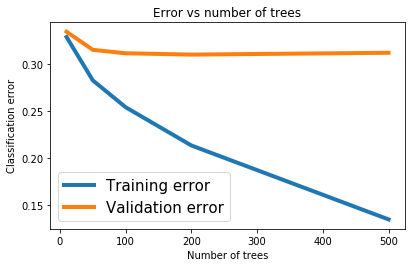

In [65]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

### The training error reduces as the number of trees increases


### It is not always true that the validation error reduces as the number of trees increases